ECON GA - 4003 Project

The Declining Fertility Rate in China

Chenhui Li 
cl6339

Introduction

Since women’s rights have been given more attention and women's status has been improved, there are more studies focusing on how women influence society. Based on the data collected by the World Bank, the total fertility rate (births per woman) has
been decreasing drastically for the last 50 years. In the meantime, there is a striking increase in women’s labor force participation. Studies on fertility and labor supply decisions of women generally predict a negative association between the number of children and female labor force participation (Gronau, 1973; Rosenzweig and Wolpin,1980b; Schultz, 1980). The result seems to make sense since women who have jobs instead of being full-time housewives would contribute more time to work and less
time to give birth. 

As a female from China, I’m interested in finding out what factors will cause the fertility rate in China to decrease. The goal of this study is to explore what varibles will have impact on fertility rate in China and whether the influence is in a positive way or a negative way from 1970 to 2020. 


Data

Data is taken from the worldbank. 
For dependent variable, I used 'births per woman' as fertility.
For independent varibales that may have an impact on fertility rate in China, I chose five main factors.
1. 'School enrollment, tertiary, female (% gross)-China ' as education 
2. 'Mortality rate, under-5 (per 1,000 live births)- China' as mortality
3. 'Wage and salaried workers, female (% of female employment) ' as salariedworker
4. 'Labor force participation rate, female (% of female population ages 15+)' as LFPR
5. 'Employment to population ratio, 15+, female (%)' as Employment.

I will run regressions to examine the effect of these variables on fertility rate in China. 

Code

In [877]:
#Import Packages 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
%pip install world_bank_data
import world_bank_data as wb
%matplotlib inline
from sklearn.linear_model import LinearRegression 


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Read data

In [878]:
countries = wb.get_countries()
dates = "1970:2020"

In [879]:
Fertility= wb.get_series("SP.DYN.TFRT.IN", date=dates)
Fertility


Country                      Series                                    Year
Africa Eastern and Southern  Fertility rate, total (births per woman)  1970    6.838304
                                                                       1971    6.844988
                                                                       1972    6.841097
                                                                       1973    6.832243
                                                                       1974    6.820429
                                                                                 ...   
Zimbabwe                     Fertility rate, total (births per woman)  2016    3.771000
                                                                       2017    3.706000
                                                                       2018    3.659000
                                                                       2019    3.599000
                                            

In [880]:
Education= wb.get_series("SE.TER.ENRR.FE", date=dates)
Education

Country                      Series                                         Year
Africa Eastern and Southern  School enrollment, tertiary, female (% gross)  1970    1.70385
                                                                            1971    1.70182
                                                                            1972    1.70165
                                                                            1973    1.70510
                                                                            1974    1.76127
                                                                                     ...   
Zimbabwe                     School enrollment, tertiary, female (% gross)  2016    8.54473
                                                                            2017    9.68927
                                                                            2018        NaN
                                                                            2019        NaN

In [881]:
Mortality= wb.get_series("SH.DYN.MORT", date=dates)
Mortality

Country                      Series                                           Year
Africa Eastern and Southern  Mortality rate, under-5 (per 1,000 live births)  1970     NaN
                                                                              1971     NaN
                                                                              1972     NaN
                                                                              1973     NaN
                                                                              1974     NaN
                                                                                      ... 
Zimbabwe                     Mortality rate, under-5 (per 1,000 live births)  2016    58.7
                                                                              2017    57.0
                                                                              2018    54.8
                                                                              2019    54.2
       

In [882]:
Salariedworker= wb.get_series("SL.EMP.WORK.FE.ZS", date=dates)
Salariedworker

Country                      Series                                                                             Year
Africa Eastern and Southern  Wage and salaried workers, female (% of female employment) (modeled ILO estimate)  1970          NaN
                                                                                                                1971          NaN
                                                                                                                1972          NaN
                                                                                                                1973          NaN
                                                                                                                1974          NaN
                                                                                                                          ...    
Zimbabwe                     Wage and salaried workers, female (% of female employment) (modeled ILO es

In [883]:
LFPR=wb.get_series("SL.TLF.CACT.FE.ZS", date=dates)
LFPR

Country                      Series                                                                                           Year
Africa Eastern and Southern  Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)  1970          NaN
                                                                                                                              1971          NaN
                                                                                                                              1972          NaN
                                                                                                                              1973          NaN
                                                                                                                              1974          NaN
                                                                                                                                        ...    
Zimba

In [884]:
Employment=wb.get_series("SL.EMP.TOTL.SP.FE.ZS", date=dates)
Employment 

Country                      Series                                                                  Year
Africa Eastern and Southern  Employment to population ratio, 15+, female (%) (modeled ILO estimate)  1970          NaN
                                                                                                     1971          NaN
                                                                                                     1972          NaN
                                                                                                     1973          NaN
                                                                                                     1974          NaN
                                                                                                               ...    
Zimbabwe                     Employment to population ratio, 15+, female (%) (modeled ILO estimate)  2016    76.112000
                                                             

In [885]:
# Cleaning data

df=pd.merge(Fertility,Education,how='left',on=('Country','Year'))
df=pd.merge(df,Mortality,how='left',on=('Country','Year'))
df=pd.merge(df,Salariedworker,how='left',on=('Country','Year'))
df=pd.merge(df,LFPR,how='left',on=('Country','Year'))
df=pd.merge(df,Employment,how='left',on=('Country','Year'))
df=df.reset_index(level=('Country','Year'))
df=df.set_index(['Country','Year'])
df.rename(columns={'SP.DYN.TFRT.IN':'Fertility',
                   'SE.TER.ENRR.FE':'Education',
                   'SH.DYN.MORT':'Mortality',
                   'SL.EMP.WORK.FE.ZS':'Salariedworker',
                   'SL.TLF.CACT.FE.ZS':'LFPR',
                   'SL.EMP.TOTL.SP.FE.ZS':'Employment'},
          inplace=True)
df

Fertility  Education  Mortality  \
Country                     Year                                    
Africa Eastern and Southern 1970   6.838304    1.70385        NaN   
                            1971   6.844988    1.70182        NaN   
                            1972   6.841097    1.70165        NaN   
                            1973   6.832243    1.70510        NaN   
                            1974   6.820429    1.76127        NaN   
...                                     ...        ...        ...   
Zimbabwe                    2016   3.771000    8.54473       58.7   
                            2017   3.706000    9.68927       57.0   
                            2018   3.659000        NaN       54.8   
                            2019   3.599000        NaN       54.2   
                            2020   3.545000        NaN       53.9   

                                  Salariedworker       LFPR  Employment  
Country                     Year                                         
Africa Eastern and Southern 1970             NaN        NaN         NaN  
                            1971             NaN        NaN         NaN  
                            1972             NaN        NaN         NaN  
                            1973             NaN        NaN         NaN  
                            1974             NaN        NaN         NaN  
...                                          ...        ...         ...  
Zimbabwe                    2016       23.719999  80.279999   76.112000  
                            2017       23.120001  80.285004   76.116997  
                            2018       22.559999  80.308998   76.126999  
                            2019       20.440001  80.338997   76.123001  
                            2020             NaN  78.980003   74.406998  

[13566 rows x 6 columns]

In [886]:
# Get data for China only

df=df.query('Country =="China"').reset_index('Year')
df

,Year,Fertility,Education,Mortality,Salariedworker,LFPR,Employment
Country,,,,,,,
China,1970,6.085,NaN,112.5,NaN,NaN,NaN
China,1971,5.523,NaN,106.8,NaN,NaN,NaN
China,1972,5.112,NaN,101.3,NaN,NaN,NaN
China,1973,4.726,NaN,95.7,NaN,NaN,NaN
China,1974,4.170,0.214170,90.2,NaN,NaN,NaN
China,1975,3.571,0.330470,84.7,NaN,NaN,NaN
China,1976,3.235,0.378960,79.4,NaN,NaN,NaN
China,1977,2.844,0.432830,74.5,NaN,NaN,NaN
China,1978,2.716,0.422000,70.0,NaN,NaN,NaN


In [897]:
df.describe()

,Fertility,Education,Mortality,Salariedworker,LFPR,Employment
count,51.000000,26.000000,51.000000,29.000000,31.000000,30.000000
mean,2.339922,24.463191,45.072549,44.705517,67.433194,64.946567
std,1.097411,21.449861,28.033259,6.215199,3.800442,4.021363
min,1.281000,0.214170,7.300000,33.700001,61.818001,59.136002
25%,1.626000,1.038782,19.300000,39.730000,63.597000,61.059999
50%,1.772000,20.569990,47.500000,44.439999,67.169998,64.228502
75%,2.730000,42.957464,56.750000,50.689999,71.159500,68.970497
max,6.085000,63.927010,112.500000,54.150002,73.022003,71.278999


The maximum of fertility rate in China since 1970 is 6.085, the minimum is 1.281 with a mean of 2.34.

Text(0, 0.5, 'Fertility Rate')

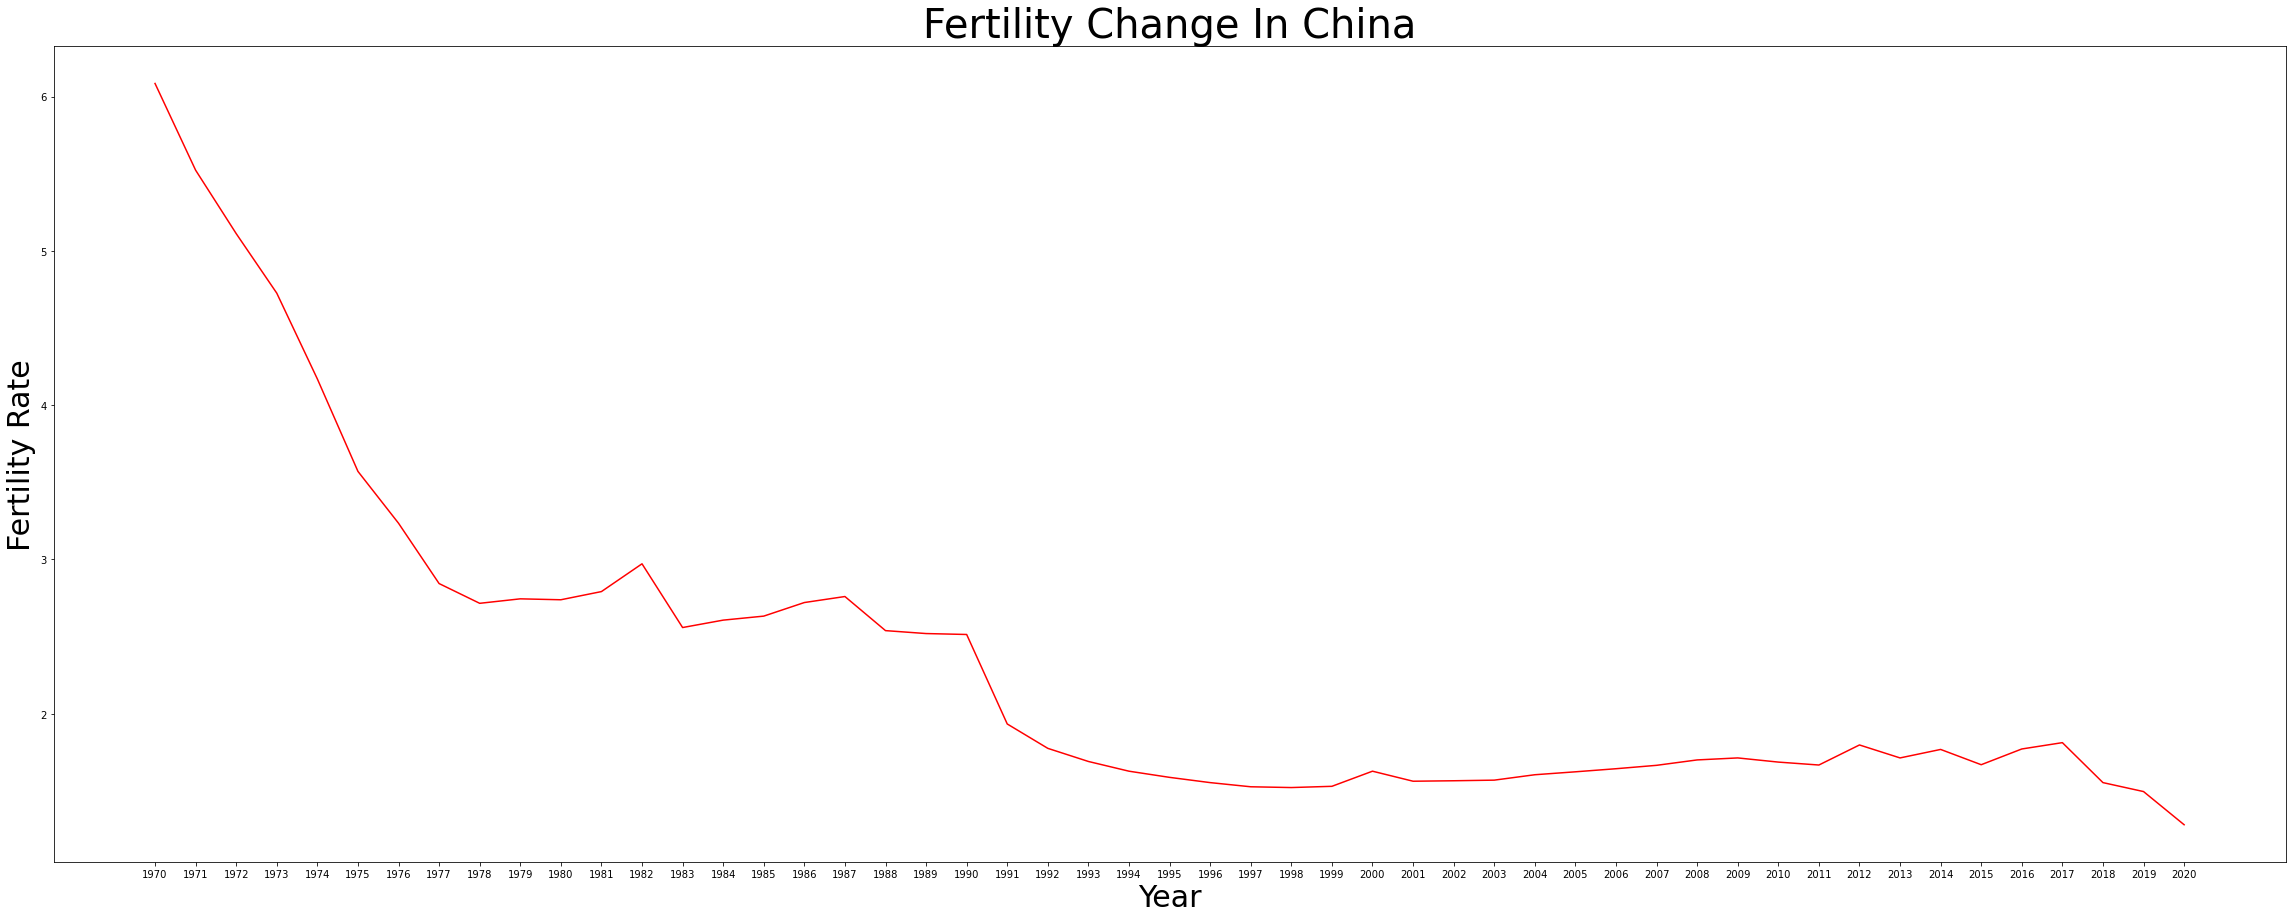

In [888]:
# Create a line chart illustrating the change in fertility rate in China
fig, ax = plt.subplots(figsize=(40,15))
ax.plot(df['Year'], df['Fertility'],color='red', alpha=1)

# Set title and lables
ax.set_title('Fertility Change In China',fontsize=40)
ax.set_xlabel('Year',fontsize=30)
ax.set_ylabel('Fertility Rate',fontsize=30)

The line chart clearly shows the trend of fertility rate in China from 1970 to 2020. We can observe an obvious decline since 1970.

(0.0, 6.0, 6.0, 0.0)

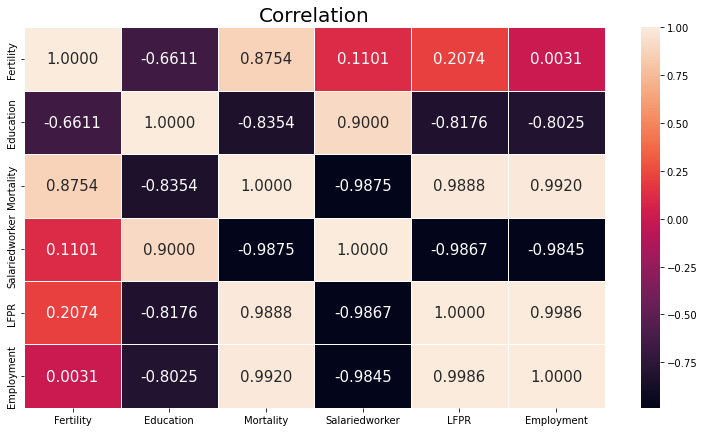

In [889]:
# Create correlation map
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Correlation"
plt.title(title,fontsize=20) #change font size
tl = ax.title
tl.set_position([0.5,1.05])
data=df.corr() #define data as correlation 
sns.heatmap(data, annot=True, linewidths=.9, fmt= '.4f',ax=ax,annot_kws={"fontsize":15})
ax.axis('tight')


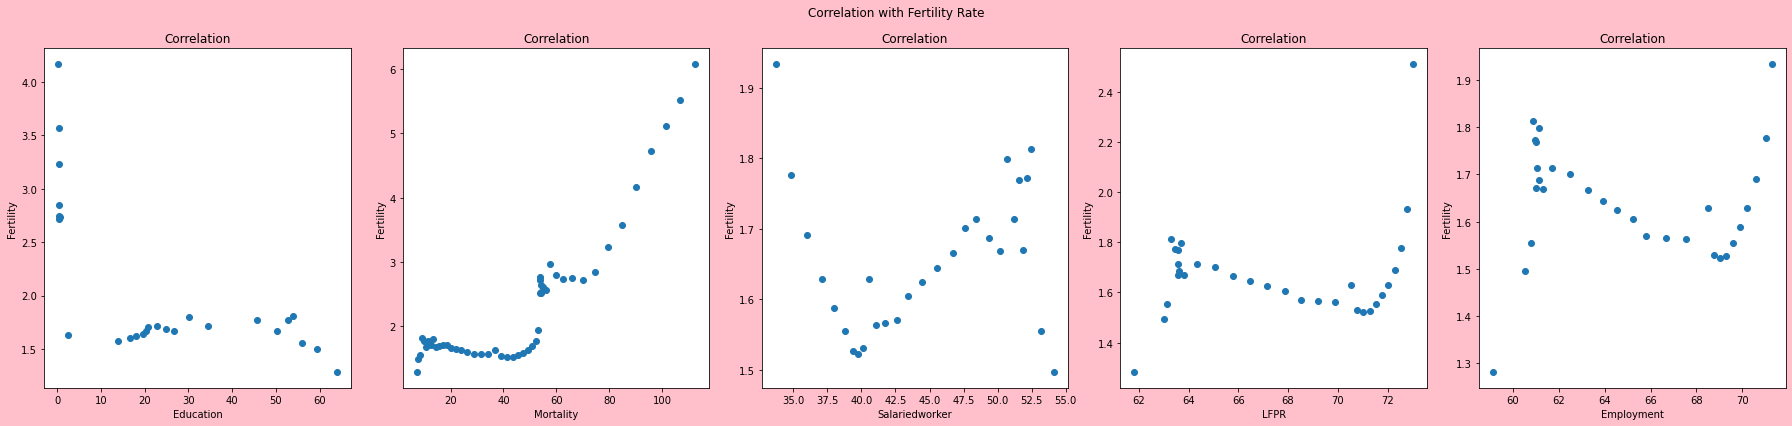

In [890]:
# Crteate correlation scatterplot

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(25, 6))
x = 0
for i in ["Education","Mortality","Salariedworker","LFPR","Employment"]:
    ax[x].scatter(x = df[i], y = df['Fertility'])
    ax[x].set_xlabel(i)
    ax[x].set_ylabel("Fertility")
    x=x+1
    
for i in [0,1,2,3,4]:
      ax[i].set_title("Correlation")
        
fig.suptitle("Correlation with Fertility Rate")
fig.set_facecolor('pink')
fig.tight_layout() 

The correlation map shows that education has a strong negative correlation with fertility rate while mortality has a strong positive correlation with fertility rate. Salariedwork, LFPR, and employment only have weak positive correlation with fertility,
To further explore the linear assosiation between these variables with fertility, I will run regressions separately to examine the relationships between five indepedent variables and fertility.

Regression Analysis

In [891]:
edu=sm.ols(formula="Fertility ~ Education ", data=df).fit()
print(edu.params)
print(edu.summary())

Intercept    2.608338
Education   -0.022676
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     18.63
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           0.000236
Time:                        12:24:09   Log-Likelihood:                -20.936
No. Observations:                  26   AIC:                             45.87
Df Residuals:                      24   BIC:                             48.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

The p-value is 0.00, means the coefficient estimating how education level influence fertility rate is satistically siginificant.

In [892]:
mor=sm.ols(formula="Fertility ~ Mortality ", data=df).fit()
print(mor.params)
print(mor.summary())

Intercept    0.795302
Mortality    0.034270
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     160.7
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.36e-17
Time:                        12:24:09   Log-Likelihood:                -39.526
No. Observations:                  51   AIC:                             83.05
Df Residuals:                      49   BIC:                             86.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

The p-value is 0.00, means the coefficient estimating how mortality rate of kids influence fertility rate is satistically siginificant.

In [893]:
sal=sm.ols(formula="Fertility ~ Salariedworker ", data=df).fit()
print(sal.params)
print(sal.summary())

Intercept         1.571559
Salariedworker    0.001849
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.3313
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.570
Time:                        12:24:09   Log-Likelihood:                 25.072
No. Observations:                  29   AIC:                            -46.14
Df Residuals:                      27   BIC:                            -43.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

The p-value is 0.57, means the coefficient estimating how salariedwork influence fertility rate is not satistically siginificant.

In [894]:
LFPR=sm.ols(formula="Fertility ~ LFPR", data=df).fit()
print(LFPR.params)
print(LFPR.summary())

Intercept    0.941431
LFPR         0.010803
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.303
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.263
Time:                        12:24:09   Log-Likelihood:                 7.4097
No. Observations:                  31   AIC:                            -10.82
Df Residuals:                      29   BIC:                            -7.951
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

The p-value is 0.263, means the coefficient estimating how labor force participation rate influence fertility rate is not satistically siginificant.

In [895]:
emp=sm.ols(formula="Fertility ~ Employment", data=df).fit()
print(emp.params)
print(emp.summary())

Intercept     1.635556
Employment    0.000096
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                 0.0002731
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.987
Time:                        12:24:09   Log-Likelihood:                 20.777
No. Observations:                  30   AIC:                            -37.55
Df Residuals:                      28   BIC:                            -34.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

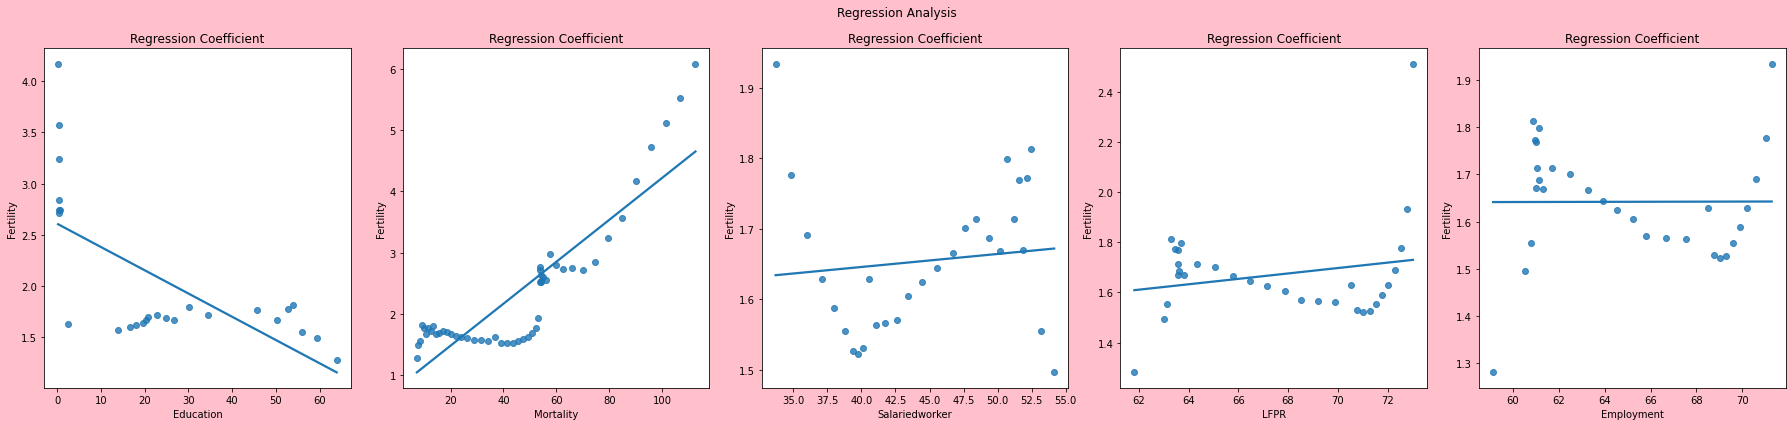

In [896]:
# Create regression plot

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(25, 6))
x = 0
for i in ["Education","Mortality","Salariedworker","LFPR","Employment"]:
    sns.regplot(x = i,
            y = "Fertility", 
            ci = None,
            data = df,
            ax=ax[x])
    x=x+1
    
for i in [0,1,2,3,4]:
      ax[i].set_title("Regression Coefficient")

# Set title and face colore
fig.suptitle("Regression Analysis")
fig.set_facecolor('pink')
fig.tight_layout() 

The p-value is 0.987, means the coefficient estimating how employment rate influence fertility rate is not satistically siginificant.

Conclusion

Overall, based on the regression result, it's safe to conclude that only the education level of women and the mortality rate of children can influence the fertility rate. The coefficient that estimates the relationship between education level and the fertility rate is -0.022676, suggesting that the education level of women negatively impacted the fertility rate in the past years. The more Chinese girls enter college, the lower the fertility rate in China. When examining the effect of the mortality rate of children, I obtained a coefficient of 0.034270, which implies that the mortality rate of children had a positive impact on the fertility rate in the past years. The lower the mortality rate of children under 5, the lower the fertility rate. Although the results are not as expected, it still answers my question of what factors causing the fertility rate in China to decrease since 1970. 


This study also has limitations. First of all, I planned to study the declining fertility rate in China since 1970; however, education level, salariedworker, LFPR, and employment all have missing data, which may influence the final result. Secondly, other factors, such as China's policy, exist that cause the fertility rate to decrease. China implemented a new rule in family planning in 1980 that only one kid in each family. If you have more than one, you need to pay a large amount of fine. This rule has been canceled since 2007, but it still influenced the fertility rate at some level. Finally, it's also important
to note that the OLS regression results of the labor force participation rate and employment rate of women show that a strong multicollinearity may exist. Multicollinearity means that the independent variables have a linear relationship with other independent variables. In this case, the labor force participation rate and employment rate may be affected by education. In a further study, instrumental variables could be used to avoid multicollinearity. 